In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,source,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,train,14,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,train,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,train,14,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,train,15,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,train,26,0,...,0,1,0,0,0,0,0,0,0,0


# Single Linear Regression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['Item_Visibility'],df['Item_Outlet_Sales'],test_size=0.3, random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train.as_matrix().reshape((-1,1)),y_train)

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
lr.coef_

array([-4381.14536866])

In [8]:
lr.intercept_

2480.384713926589

In [9]:
y_pred1 = lr.predict(X_test.as_matrix().reshape((-1,1)))

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [10]:
y_pred1

array([2238.97690096, 2156.02476333, 1936.63754646, ..., 2112.67707141,
       2350.61867988, 1919.67019849])

In [11]:
res = y_test - y_pred1

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.scatterplot(df['Item_Visibility'],df['Item_Outlet_Sales'])
sns.lineplot(X_test,y_pred1,color="red")
plt.show()



C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2000x1000 with 1 Axes>

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_absolute_error(y_test,y_pred1))
print(mean_squared_error(y_test,y_pred1))
print(r2_score(y_test,y_pred1))

1349.757624849403
2866091.798440855
0.014715916655345662


# Multi Linear Regression


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[['Item_MRP','Item_Visibility','Item_Weight']],df['Item_Outlet_Sales'],test_size=0.3, random_state=1)

In [15]:
lin2 = LinearRegression()

lin2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lin2.coef_

array([ 1.56272609e+01, -4.27914888e+03,  1.89460330e+00])

In [17]:
lin2.intercept_

239.0634779876309

In [18]:
y_pred2 = lin2.predict(X_test)

In [19]:
res = y_test - y_pred2

In [20]:
print(mean_absolute_error(y_test,y_pred2))
print(mean_squared_error(y_test,y_pred2))
print(r2_score(y_test,y_pred2))

1034.8523759713744
1916553.7588942128
0.341141161444971


# Polynomial regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['Item_Visibility'],df['Item_Outlet_Sales'],test_size=0.3, random_state=1)

In [22]:
from sklearn.preprocessing import PolynomialFeatures as pf

pf = pf(10)

X_poly = pf.fit_transform(X_train.as_matrix().reshape((-1,1)))


lin3 = LinearRegression()

lin3.fit(X_poly,y_train)

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred_p = lin3.predict(pf.fit_transform(X_test.as_matrix().reshape((-1,1))))

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [24]:
lin3.coef_

array([ 0.00000000e+00,  4.13697382e+04, -3.17403456e+06,  8.65811898e+07,
       -1.06916166e+09,  5.37512594e+09,  8.06610358e+09, -2.26857188e+11,
        1.08577230e+12, -2.27089403e+12,  1.81650173e+12])

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


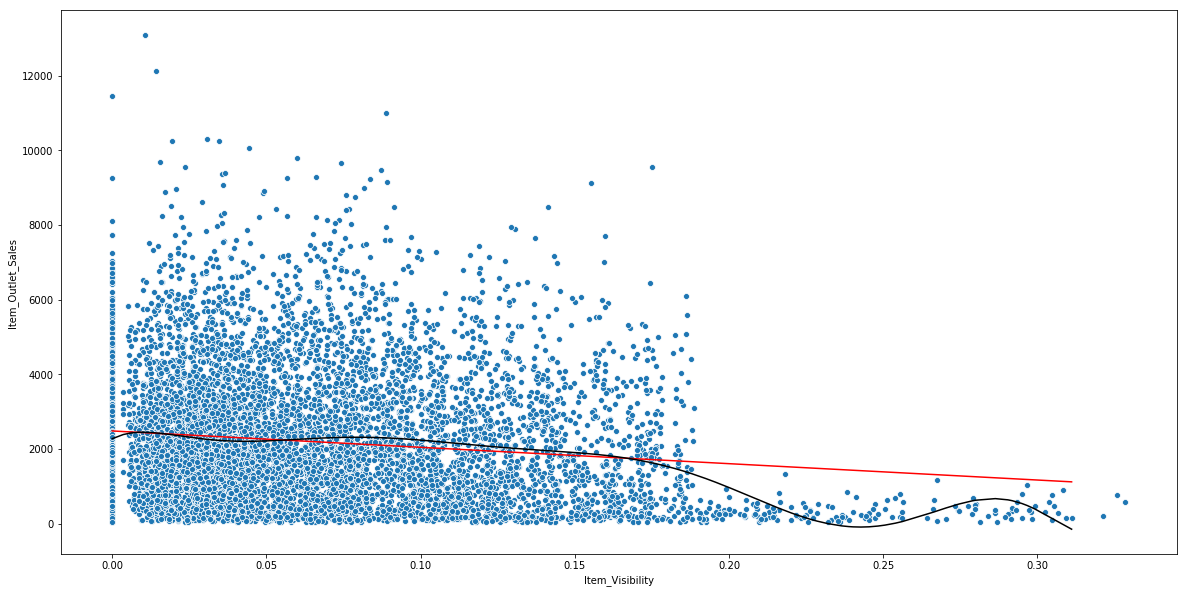

In [25]:

plt.figure(figsize=(20,10))
sns.scatterplot(df['Item_Visibility'],df['Item_Outlet_Sales'])
sns.lineplot(X_test,y_pred1,color="red")
sns.lineplot(X_test,y_pred_p,color="black")
plt.show()

In [26]:
print(mean_absolute_error(y_test,y_pred_p))
print(mean_squared_error(y_test,y_pred_p))
print(r2_score(y_test,y_pred_p))

1336.0097506193313
2835257.241533904
0.025315995185255624
